In [336]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [337]:
universities_df=pd.read_csv('universities_data.csv')
universities_df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,"-865,685","3,478,337",Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,"-868,092","3,350,223",Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,"-86,174","3,236,261",Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,"-866,384","3,472,282",Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,"-862,957","3,236,432",Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [27]:
x =universities_df.shape 
x

(1534, 145)

In [28]:
x =(universities_df.shape[0],universities_df.shape[1])
x#0 for rows and 1for columns

(1534, 145)

In [29]:
print('The dataset contains row and columns in this order ', x)

The dataset contains row and columns in this order  (1534, 145)


In [30]:
print('The dataset contains {} rows and {} columns'.format(universities_df.shape[0],universities_df.shape[1])) #0 for rows and 1for columns

The dataset contains 1534 rows and 145 columns


In [338]:
universities_df.isna().sum()

ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving student loan aid             42
Percent of freshmen receiving federal student loans        42
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
Length: 145, dtype: int64

In [31]:
universities_df.info

<bound method DataFrame.info of       ID number                                           Name  year  \
0        100654                       Alabama A & M University  2013   
1        100663            University of Alabama at Birmingham  2013   
2        100690                             Amridge University  2013   
3        100706            University of Alabama in Huntsville  2013   
4        100724                       Alabama State University  2013   
...         ...                                            ...   ...   
1529     451671   University of South Florida-Sarasota-Manatee  2013   
1530     454184                           The Kingâ€™s College  2013   
1531     454582                       Ottawa University-Online  2013   
1532     455770                   Providence Christian College  2013   
1533     456490  Polytechnic University of Puerto Rico-Orlando  2013   

        ZIP code                             Highest degree offered  \
0          35762             Doc

In [44]:
universities_df.info(max_cols=len(universities_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [33]:
len(universities_df)

1534

In [34]:
universities_df.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [35]:
perc_nan=universities_df.isna().sum()/len(universities_df)*100
perc_nan

ID number                                                 0.000000
Name                                                      0.000000
year                                                      0.000000
ZIP code                                                  0.000000
Highest degree offered                                    0.000000
                                                           ...    
Percent of freshmen receiving student loan aid            2.737940
Percent of freshmen receiving federal student loans       2.737940
Percent of freshmen receiving other loan aid              2.737940
Endowment assets (year end) per FTE enrollment (GASB)    66.362451
Endowment assets (year end) per FTE enrollment (FASB)    37.418514
Length: 145, dtype: float64

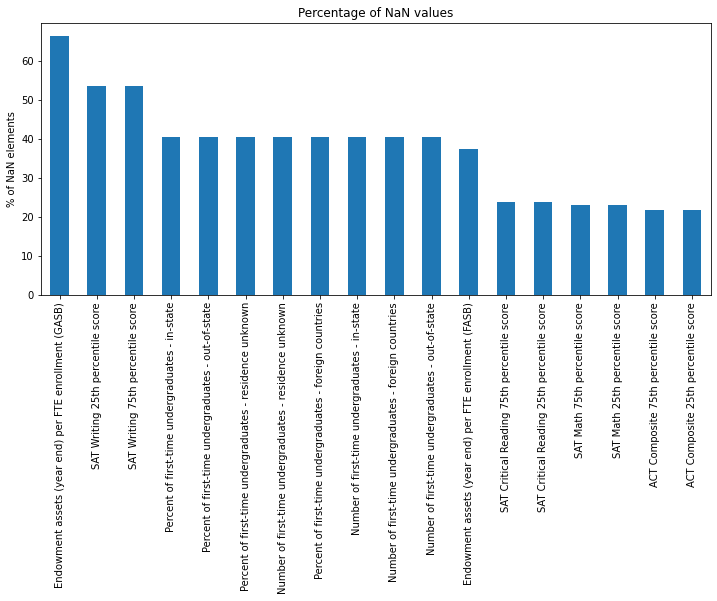

In [36]:
ax=perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(12,5));
ax.set_ylabel('% of NaN elements');

In [255]:
colum_off=universities_df.isna().sum()[universities_df.isna().sum()>=(0.2*len(universities_df))]
list_colum_off=colum_off.index.to_list()
list_colum_off

['SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentile score',
 'SAT Writing 75th percentile score',
 'ACT Composite 25th percentile score',
 'ACT Composite 75th percentile score',
 'Number of first-time undergraduates - in-state',
 'Percent of first-time undergraduates - in-state',
 'Number of first-time undergraduates - out-of-state',
 'Percent of first-time undergraduates - out-of-state',
 'Number of first-time undergraduates - foreign countries',
 'Percent of first-time undergraduates - foreign countries',
 'Number of first-time undergraduates - residence unknown',
 'Percent of first-time undergraduates - residence unknown',
 'Endowment assets (year end) per FTE enrollment (GASB)',
 'Endowment assets (year end) per FTE enrollment (FASB)']

In [256]:
universitiesnw_df=universities_df.copy()

In [257]:
universitiesnw_df.drop(list_colum_off,axis=1,inplace=True)

In [45]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [258]:
interesting_columns

['Name',
 'year',
 'Highest degree offered',
 "Offers Bachelor's degree",
 "Offers Master's degree",
 "Offers Doctor's degree - research/scholarship",
 "Offers Doctor's degree - professional practice",
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Estimated enrollment, total',
 'Tuition and fees, 2013-14',
 'Total price for in-state students living on campus 2013-14',
 'Total price for out-of-state students living on campus 2013-14',
 'State abbreviation',
 'Control of institution',
 'Total enrollment',
 'Full-time enrollment',
 'Part-time enrollment',
 'Undergraduate enrollment',
 'Graduate enrollment',
 'Full-time undergraduate enrollment',
 'Part-time undergraduate enrollment',
 'Percent of total enrollment that are women',
 'Percent of undergraduate enrollment that are women',
 'Percent of graduate enrollment that are women',
 'Graduation rate - Bachelor degree within 4 years, total',
 'Graduation rate - Bachelor degree within 5 years, total',
 'Graduation rate - B

In [259]:
universitiesnw_df=universitiesnw_df[interesting_columns]
universitiesnw_df

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,0.0,0.0,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,2013,Master's degree,Yes,Yes,Implied no,Implied no,393.0,136.0,86.0,...,1728.0,149.0,837.0,891.0,60.0,59.0,65.0,NaN,NaN,NaN
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,516.0,0.0,493.0,23.0,60.0,60.0,NaN,57.0,61.0,61.0
1531,Ottawa University-Online,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,383.0,75.0,1.0,382.0,61.0,61.0,60.0,NaN,NaN,NaN
1532,Providence Christian College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,122.0,65.0,20.0,...,66.0,0.0,66.0,0.0,52.0,52.0,NaN,46.0,54.0,54.0


In [48]:
universitiesnw_df[universitiesnw_df['Total enrollment'].isna()][['Name','Applicants total','Admissions total','Enrolled total','Total enrollment']]

,Name,Applicants total,Admissions total,Enrolled total,Total enrollment
257,University of North Georgia,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,NaN,NaN,NaN,NaN


In [ ]:
#basically can use .index[0] or not .... index [0] give the number of the row while w/o it shows the full row
#they both mean same

In [260]:
a=universitiesnw_df[universitiesnw_df['Name']=='University of North Georgia'].index[0]
b=universitiesnw_df[universitiesnw_df['Name']=='Texas A & M University-Galveston'].index[0]
universitiesnw_df=universitiesnw_df.drop([a,b],axis=0)

In [52]:
print('The data frame now has {} columns out of the {} original columns, and {} rows out of the {} original rows.'.format(universitiesnw_df.shape[1],universities_df.shape[1],universitiesnw_df.shape[0],universities_df.shape[0]))

The data frame now has 29 columns out of the 145 original columns, and 1532 rows out of the 1534 original rows.


In [261]:
col=universitiesnw_df.select_dtypes(include=['float64','int64']).columns
col   #we are selecting only columns with obj type float and int (basically data types that can be + or -)

Index(['year', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Estimated enrollment, total', 'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'Total enrollment', 'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total'],
      dtype='object')

In [262]:
#can also create an empty list as lt =[]
lt=list()  #using the above we want to check and remove -ve values
for i in col:
    y=any(x < 0 for x in universitiesnw_df[i])
    if y==True:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))

There are 0 negative values in the data frame.


In [60]:
universitiesnw_df.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,...,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,...,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,...,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,...,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,...,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,...,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [62]:
universitiesnw_df.describe().T #T means transpose meaning to flip the row and columns..so column area will have rows and rows will become column

,count,mean,std,min,25%,50%,75%,max
year,1532.0,2013.000000,0.000000,2013.0,2013.00,2013.0,2013.00,2013.0
Applicants total,1377.0,6391.193174,8787.469171,0.0,1488.00,3350.0,7016.00,72676.0
Admissions total,1377.0,3554.880174,4309.457606,0.0,950.00,2056.0,4203.00,35815.0
Enrolled total,1377.0,1043.046478,1285.165519,0.0,287.00,538.0,1246.00,10241.0
"Estimated enrollment, total",1532.0,7033.115535,9387.648898,68.0,1497.25,3126.0,8376.00,79576.0
"Tuition and fees, 2013-14",1497.0,20727.490314,12455.805360,1032.0,8542.00,20060.0,29992.00,49138.0
Total price for in-state students living on campus 2013-14,1400.0,34935.306429,13283.049319,9768.0,22487.00,34115.0,44835.75,64988.0
Total price for out-of-state students living on campus 2013-14,1400.0,38767.612857,10716.524007,9768.0,31128.00,37193.5,45907.50,64988.0
Total enrollment,1532.0,7070.114230,9416.538854,66.0,1512.75,3127.0,8376.25,77338.0
Full-time enrollment,1532.0,5371.494125,7474.494963,0.0,1199.00,2328.0,6080.75,50012.0


In [263]:
total_zero=(universitiesnw_df[universitiesnw_df.loc[0:]==0]).count().sum()
total_zero

395

In [ ]:
print('This data set contains {} zero values.'.format(total_zero))

In [264]:
universitiesnw_df.replace(0,np.nan,inplace=True) #replace 0 with nan

In [265]:
total_zero_nw=universitiesnw_df[universitiesnw_df.loc[0:]==0].count().sum()
total_zero_nw

0

In [67]:
print('This data set contains {} zero values.'.format(total_zero_nw))

This data set contains 0 zero values.


In [266]:
universitiesnw_df[['Name','Applicants total']].sort_values('Applicants total').head()

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0


In [ ]:
#same as above

In [74]:
universitiesnw_df.sort_values(by ='Applicants total').head()[['Name','Applicants total']]

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0


In [267]:
universitiesnw_df.columns

Index(['Name', 'year', 'Highest degree offered', 'Offers Bachelor's degree',
       'Offers Master's degree',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice', 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 year

In [123]:
def remove_space(list_headers,charact): #charact should be: charact=[' - ',' ']
    new_headers=list()
    for header in list_headers:
        for char in charact:      
            if char in header:
                header=header.replace(char,'_')
            header=header
        new_headers.append(header)
    return new_headers

In [124]:
def remove_sp_char(headers,chars):
    new_headers=list()
    for header in headers:    
        for char in chars:
            if char=='-' or char=='/':
                header=header.replace(char,'_')
            if char in header:
                header=header.replace(char,'')
            
            header=header   
        new_headers.append(header)
    return new_headers   

In [ ]:
#can also be done like this

In [268]:
headers= remove_space(universitiesnw_df.columns,[' - ',' '])

In [269]:
headers= remove_sp_char(headers,["'",',',':','-','/'])

In [270]:
headers

['Name',
 'year',
 'Highest_degree_offered',
 'Offers_Bachelors_degree',
 'Offers_Masters_degree',
 'Offers_Doctors_degree_research_scholarship',
 'Offers_Doctors_degree_professional_practice',
 'Applicants_total',
 'Admissions_total',
 'Enrolled_total',
 'Estimated_enrollment_total',
 'Tuition_and_fees_2013_14',
 'Total_price_for_in_state_students_living_on_campus_2013_14',
 'Total_price_for_out_of_state_students_living_on_campus_2013_14',
 'State_abbreviation',
 'Control_of_institution',
 'Total_enrollment',
 'Full_time_enrollment',
 'Part_time_enrollment',
 'Undergraduate_enrollment',
 'Graduate_enrollment',
 'Full_time_undergraduate_enrollment',
 'Part_time_undergraduate_enrollment',
 'Percent_of_total_enrollment_that_are_women',
 'Percent_of_undergraduate_enrollment_that_are_women',
 'Percent_of_graduate_enrollment_that_are_women',
 'Graduation_rate_Bachelor_degree_within_4_years_total',
 'Graduation_rate_Bachelor_degree_within_5_years_total',
 'Graduation_rate_Bachelor_degree_wit

In [271]:

list_new_header=list()

for header in headers:
    header=header.casefold()   # All capitalized letters are changed to small letter
    
    #extra step to for help in dealing with column names
    #I will show you another way in cell 46
    if "degrese" in header:    # One column name has a typo.  
        header=header.replace("degrese",'degrees')
            
    list_new_header.append(header)



In [272]:
list_new_header

['name',
 'year',
 'highest_degree_offered',
 'offers_bachelors_degree',
 'offers_masters_degree',
 'offers_doctors_degree_research_scholarship',
 'offers_doctors_degree_professional_practice',
 'applicants_total',
 'admissions_total',
 'enrolled_total',
 'estimated_enrollment_total',
 'tuition_and_fees_2013_14',
 'total_price_for_in_state_students_living_on_campus_2013_14',
 'total_price_for_out_of_state_students_living_on_campus_2013_14',
 'state_abbreviation',
 'control_of_institution',
 'total_enrollment',
 'full_time_enrollment',
 'part_time_enrollment',
 'undergraduate_enrollment',
 'graduate_enrollment',
 'full_time_undergraduate_enrollment',
 'part_time_undergraduate_enrollment',
 'percent_of_total_enrollment_that_are_women',
 'percent_of_undergraduate_enrollment_that_are_women',
 'percent_of_graduate_enrollment_that_are_women',
 'graduation_rate_bachelor_degree_within_4_years_total',
 'graduation_rate_bachelor_degree_within_5_years_total',
 'graduation_rate_bachelor_degree_wit

In [273]:
universitiesnw_df.columns= list_new_header

In [274]:
universitiesnw_df.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state_abbreviation', 'control_of_institution', 'total_enrollment',
       'full_time_enrollment', 'part_time_enrollment',
       'undergraduate_enrollment', 'graduate_enrollment',
       'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate_bachelor_degree_within_4_years_total',
       'g

In [ ]:
#you can also rename or correct a typo of a column name as seen below

In [275]:
universitiesnw_df['state_abbreviation']

0          Alabama
1          Alabama
2          Alabama
3          Alabama
4          Alabama
           ...    
1529       Florida
1530      New York
1531        Kansas
1532    California
1533       Florida
Name: state_abbreviation, Length: 1532, dtype: object

In [276]:
universitiesnw_df.rename(columns={'state_abbreviation':'state'}, inplace=True)

In [277]:
universitiesnw_df[['state']].head(2)

,state
0,Alabama
1,Alabama


In [ ]:
# matplotlib.rcParams['figure.facecolor']='whitesmoke'

In [200]:
universitiesnw_df.describe()

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total_enrollment,full_time_enrollment,...,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1532.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,...,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,...,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,...,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,...,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,...,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,...,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,...,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [278]:
high_app_df=universitiesnw_df[['name','applicants_total']].sort_values('applicants_total',ascending=False).head(20)

In [279]:
high_app_df

,name,applicants_total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


# Top Unis with the most application

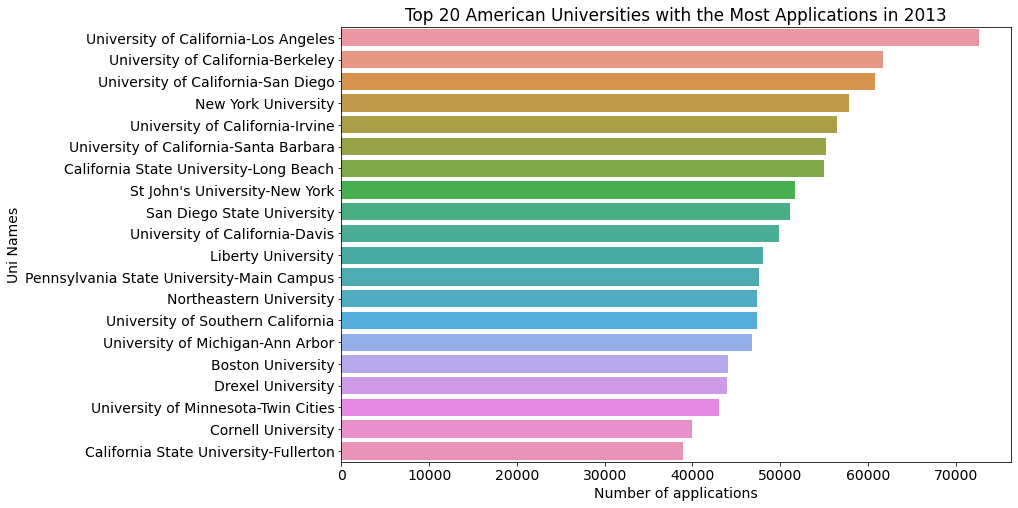

In [204]:
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=14
sns.barplot(x='applicants_total',y='name',data=high_app_df)
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications') #to give it a title
plt.ylabel('Uni Names');

# Most prefered Unis

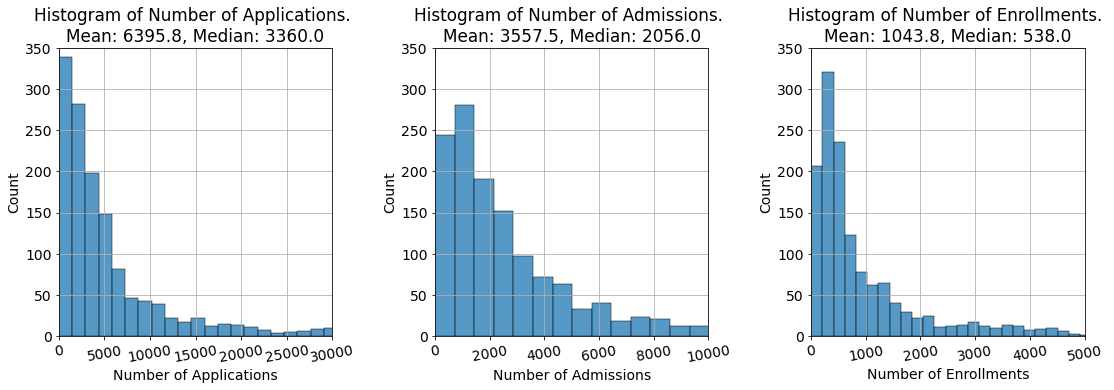

In [207]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(universitiesnw_df.applicants_total,bins=50) #size of hist =50
plt.title('''Histogram of Number of Applications. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.applicants_total.mean(),universitiesnw_df.applicants_total.median()));
plt.xlabel('Number of Applications')  #the above is to print the mean on the title aswell 
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

#{:.1f} - means to round mean and median to 1 decimal after formatting

plt.subplot(1,3,2)
sns.histplot(universitiesnw_df.admissions_total,bins=50)
plt.title('''Histogram of Number of Admissions. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.admissions_total.mean(),universitiesnw_df.admissions_total.median()));
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(universitiesnw_df.enrolled_total,bins=50)
plt.title('''Histogram of Number of Enrollments. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.enrolled_total.mean(),universitiesnw_df.enrolled_total.median()));
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);

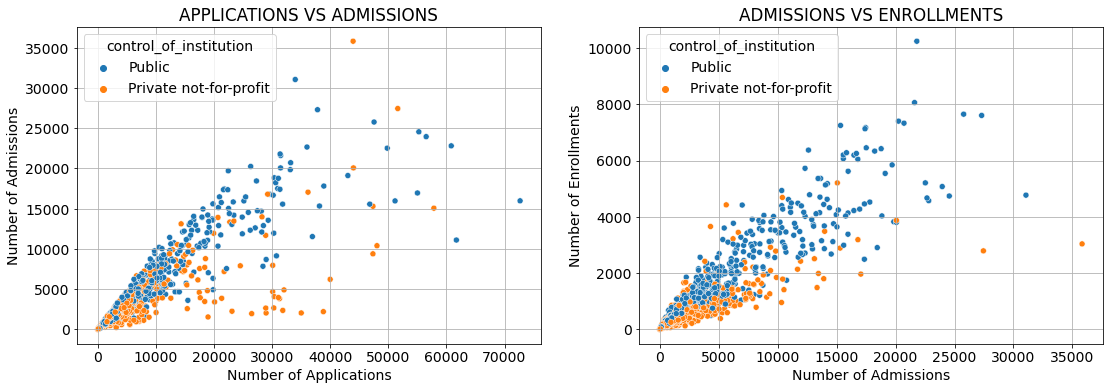

In [212]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=universitiesnw_df.admissions_total,x=universitiesnw_df.applicants_total,hue=universitiesnw_df.control_of_institution)
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1,2,2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x='admissions_total',y='enrolled_total',data=universitiesnw_df,hue='control_of_institution')
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)  #with or w/o works

In [ ]:
#to find the acceptance rate and enrollment rate

In [280]:
universitiesnw_df['acceptance_rate']=(universitiesnw_df.admissions_total/universitiesnw_df.applicants_total*100).round(2)

In [214]:
universitiesnw_df

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total,acceptance_rate
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0,89.89
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0,86.73
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,309.0,202.0,120.0,58.0,61.0,55.0,NaN,NaN,67.0,NaN
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0,80.62
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0,51.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,2013,Master's degree,Yes,Yes,Implied no,Implied no,393.0,136.0,86.0,...,149.0,837.0,891.0,60.0,59.0,65.0,NaN,NaN,NaN,34.61
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,NaN,493.0,23.0,60.0,60.0,NaN,57.0,61.0,61.0,71.15
1531,Ottawa University-Online,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,75.0,1.0,382.0,61.0,61.0,60.0,NaN,NaN,NaN,NaN
1532,Providence Christian College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,122.0,65.0,20.0,...,NaN,66.0,NaN,52.0,52.0,NaN,46.0,54.0,54.0,53.28


In [281]:
universitiesnw_df['enrollment_rate']=  ((universitiesnw_df['enrolled_total'])/ (universitiesnw_df['admissions_total'])*100).round(2)

In [282]:
universitiesnw_df

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total,acceptance_rate,enrollment_rate
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0,89.89,20.00
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0,86.73,35.93
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,202.0,120.0,58.0,61.0,55.0,NaN,NaN,67.0,NaN,NaN
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0,80.62,39.31
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0,51.25,28.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,2013,Master's degree,Yes,Yes,Implied no,Implied no,393.0,136.0,86.0,...,837.0,891.0,60.0,59.0,65.0,NaN,NaN,NaN,34.61,63.24
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,493.0,23.0,60.0,60.0,NaN,57.0,61.0,61.0,71.15,5.89
1531,Ottawa University-Online,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,1.0,382.0,61.0,61.0,60.0,NaN,NaN,NaN,NaN,NaN
1532,Providence Christian College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,122.0,65.0,20.0,...,66.0,NaN,52.0,52.0,NaN,46.0,54.0,54.0,53.28,30.77


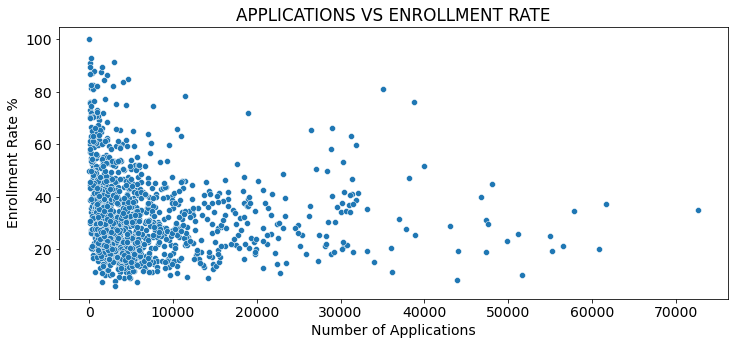

In [222]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='applicants_total',y='enrollment_rate',data=universitiesnw_df)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications');

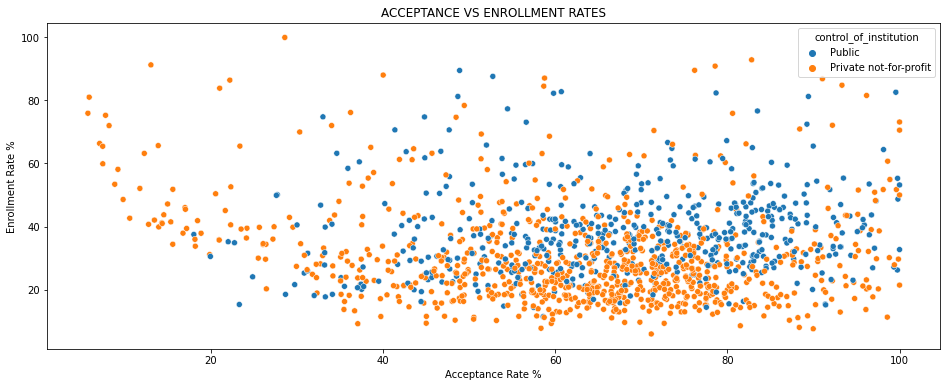

In [283]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='acceptance_rate',y='enrollment_rate',data=universitiesnw_df,hue=universitiesnw_df.control_of_institution)
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %');

In [285]:
high_acceptance=universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).head(25)

In [286]:
high_acceptance

,name,acceptance_rate,enrollment_rate
451,University of Pikeville,100.00,21.40
633,Metropolitan State University,100.00,32.68
1479,Brandman University,100.00,70.59
95,Coleman University,100.00,73.17
1343,Goddard College,100.00,50.00
709,Montana State University-Northern,100.00,53.19
1385,Southern Virginia University,99.87,29.66
1313,The University of Texas at El Paso,99.81,48.70
281,Lewis-Clark State College,99.77,55.30
799,College of Staten Island CUNY,99.75,26.19


In [284]:
low_acceptance=universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).tail(25)

In [287]:
low_acceptance

,name,acceptance_rate,enrollment_rate
796,Cornell University,15.56,51.80
698,Washington University in St Louis,15.55,34.37
320,Northwestern University,15.32,41.47
481,Bowdoin College,14.95,47.15
122,Pitzer College,14.51,43.72
1158,Swarthmore College,14.32,40.97
522,Amherst College,14.28,41.17
124,Pomona College,13.92,39.86
663,Rust College,13.86,65.68
910,Duke University,13.42,42.04


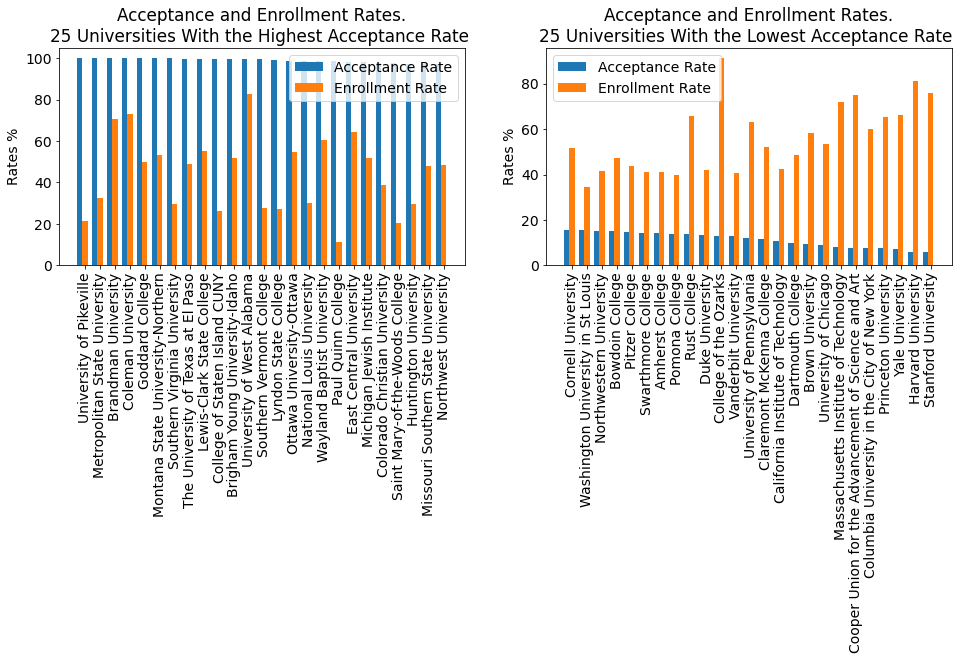

In [230]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ind = np.arange(len(high_acceptance)) # index of the number of universities
width = 0.35       #space

plt.bar(ind, high_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, high_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Highest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

plt.subplot(1,2,2)
ind = np.arange(len(low_acceptance)) #number of universities
width = 0.35       #space

plt.bar(ind, low_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, low_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Lowest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,low_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

In [240]:
#spliting the number of applications according to the type of control: private or public.
uni_private_df=universitiesnw_df[universitiesnw_df.control_of_institution=='Private not-for-profit']
uni_private_df=uni_private_df[uni_private_df.applicants_total.notnull()]

uni_public_df=universitiesnw_df[universitiesnw_df.control_of_institution=='Public']
uni_public_df=uni_public_df[uni_public_df.applicants_total.notnull()]

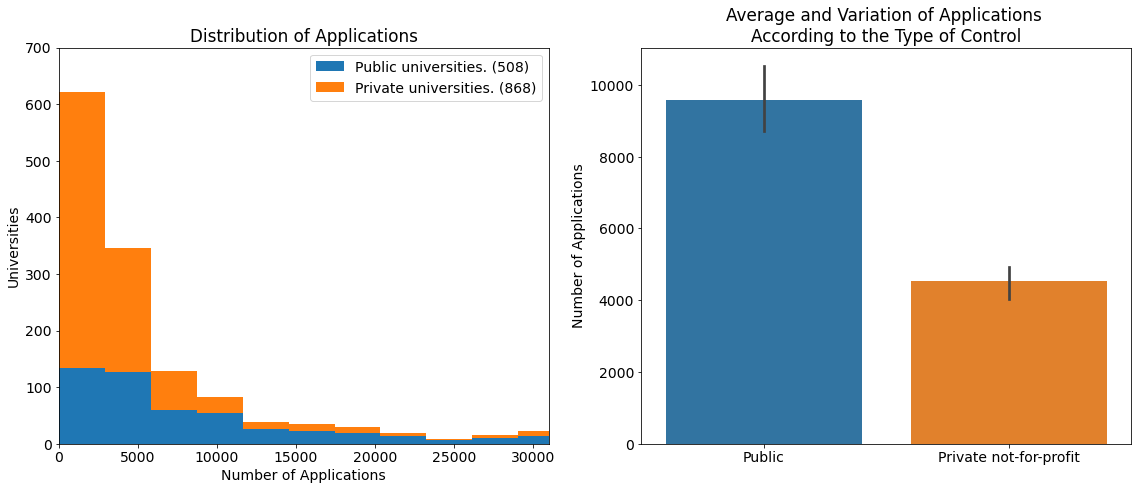

In [245]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.hist([uni_public_df.applicants_total,uni_private_df.applicants_total],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(uni_public_df)),'Private universities. ({})'.format(len(uni_private_df))]);

plt.subplot(1,2,2)
sns.barplot(x=universitiesnw_df.control_of_institution,y=universitiesnw_df.applicants_total);
plt.title('''Average and Variation of Applications 
According to the Type of Control''')
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1)

In [288]:
print('The minimum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(uni_private_df.applicants_total.min()),int(uni_public_df.applicants_total.min())))

The minimum number of applications for private universities was 4; whereas, for public universities was 193.


In [289]:
print('The maximum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(uni_private_df.applicants_total.max()), int(uni_public_df.applicants_total.max())))

The maximum number of applications for private universities was 57845; whereas, for public universities was 72676.


In [ ]:
#relationship between the rate of enrollment and the inclination for public or private unis

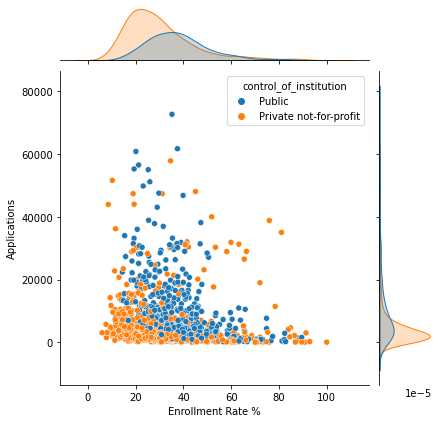

In [290]:
g=sns.jointplot(x=universitiesnw_df.enrollment_rate,y=universitiesnw_df.applicants_total,hue=universitiesnw_df.control_of_institution,height=6);
g=(g.set_axis_labels("Enrollment Rate %","Applications"));

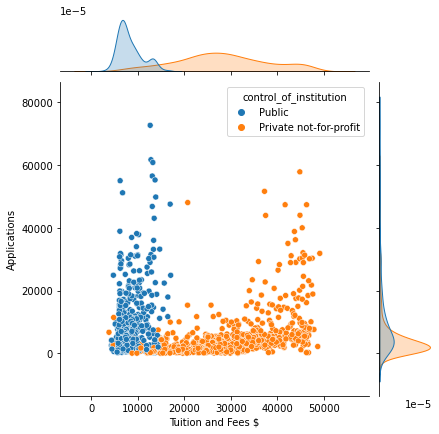

In [291]:
g=sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14,y=universitiesnw_df.applicants_total,hue=universitiesnw_df.control_of_institution,height=6);
g=(g.set_axis_labels("Tuition and Fees $","Applications"))

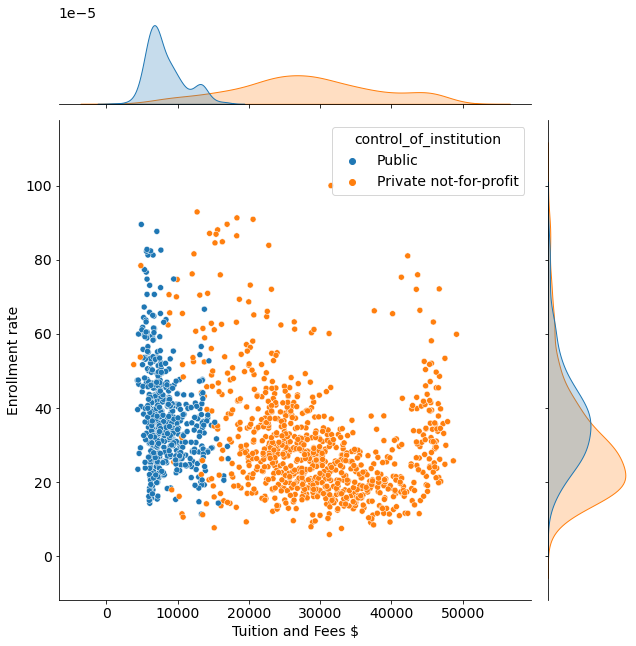

In [250]:
g=sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.control_of_institution,height=9);
g=(g.set_axis_labels('Tuition and Fees $','Enrollment rate'))

In [ ]:
#do students prefer a uni for low cost of living

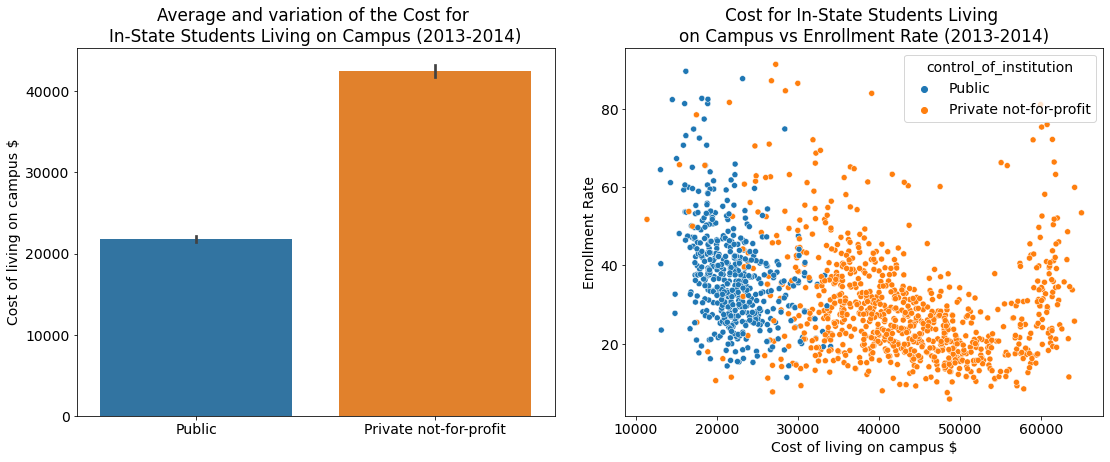

In [251]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(y=universitiesnw_df.total_price_for_in_state_students_living_on_campus_2013_14,x=universitiesnw_df.control_of_institution)
plt.title('''Average and variation of the Cost for 
In-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')


plt.subplot(1,2,2)
sns.scatterplot(x=universitiesnw_df.total_price_for_in_state_students_living_on_campus_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.control_of_institution);
plt.title('''Cost for In-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')


plt.tight_layout(pad=2)

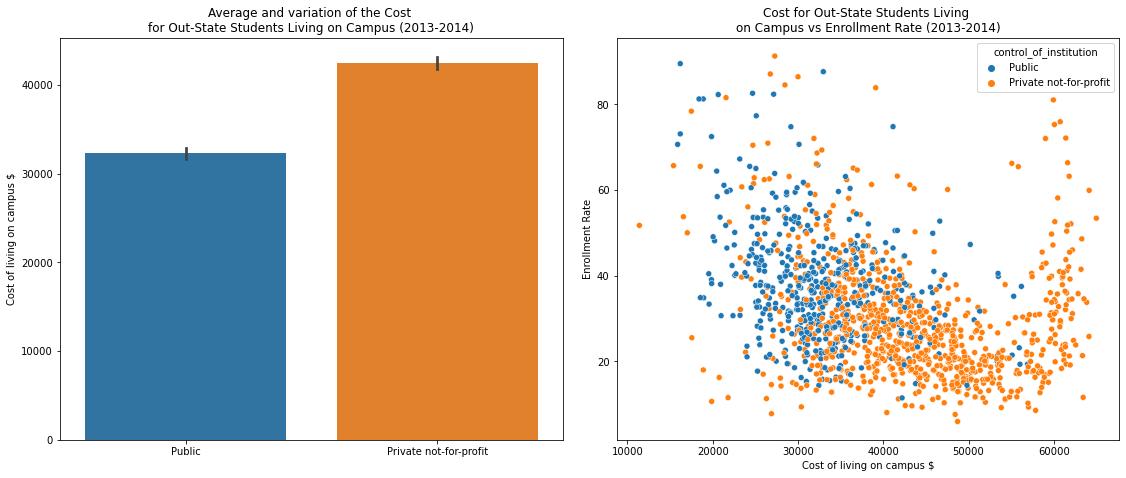

In [292]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,2)
sns.scatterplot(x=universitiesnw_df.total_price_for_out_of_state_students_living_on_campus_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.control_of_institution);
plt.title('''Cost for Out-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')

plt.subplot(1,2,1)
sns.barplot(y=universitiesnw_df.total_price_for_out_of_state_students_living_on_campus_2013_14,x=universitiesnw_df.control_of_institution)
plt.title('''Average and variation of the Cost 
for Out-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.tight_layout(pad=2)

In [293]:
region=pd.read_csv('region.csv')
region

,state,region
0,Alabama,South
1,Alaska,West
2,Arizona,Southwest
3,Arkansas,South
4,California,West
5,Colorado,West
6,Connecticut,New England
7,Delaware,Mid – Atlantic
8,District of Columbia,Mid – Atlantic
9,Florida,South


In [294]:
universitiesnw_df=universitiesnw_df.merge(region,on='state')

In [295]:
universitiesnw_df

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total,acceptance_rate,enrollment_rate,region
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,252.0,55.0,51.0,69.0,10.0,23.0,29.0,89.89,20.00,South
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,3145.0,61.0,58.0,64.0,29.0,46.0,53.0,86.73,35.93,South
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,120.0,58.0,61.0,55.0,NaN,NaN,67.0,NaN,NaN,South
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,1459.0,44.0,44.0,43.0,16.0,37.0,48.0,80.62,39.31,South
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,484.0,61.0,59.0,71.0,9.0,19.0,25.0,51.25,28.17,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,University of Wisconsin-Platteville,2013,Master's degree,Yes,Yes,Implied no,Implied no,3399.0,3279.0,1754.0,...,829.0,36.0,35.0,46.0,19.0,47.0,54.0,96.47,53.49,Midwest
1528,University of Wisconsin-River Falls,2013,Master's degree,Yes,Yes,Implied no,Implied no,2602.0,2254.0,1119.0,...,533.0,61.0,60.0,69.0,23.0,46.0,51.0,86.63,49.65,Midwest
1529,University of Wisconsin-Stevens Point,2013,Doctor's degree - professional practice,Yes,Yes,Implied no,Yes,4432.0,3672.0,1637.0,...,663.0,53.0,52.0,77.0,22.0,52.0,58.0,82.85,44.58,Midwest
1530,Ottawa University-Milwaukee,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,286.0,75.0,76.0,69.0,NaN,NaN,NaN,NaN,NaN,Midwest


In [297]:
in_state_df=universitiesnw_df[['name','enrollment_rate','total_price_for_in_state_students_living_on_campus_2013_14','control_of_institution','state','region']]
in_state_df=in_state_df.rename(columns={'total_price_for_in_state_students_living_on_campus_2013_14':'price_living'})
in_state_df['from']='In-State'
in_state_df

,name,enrollment_rate,price_living,control_of_institution,state,region,from
0,Alabama A & M University,20.00,21849.0,Public,Alabama,South,In-State
1,University of Alabama at Birmingham,35.93,22495.0,Public,Alabama,South,In-State
2,Amridge University,NaN,NaN,Private not-for-profit,Alabama,South,In-State
3,University of Alabama in Huntsville,39.31,23466.0,Public,Alabama,South,In-State
4,Alabama State University,28.17,18286.0,Public,Alabama,South,In-State
...,...,...,...,...,...,...,...
1527,University of Wisconsin-Platteville,53.49,17684.0,Public,Wisconsin,Midwest,In-State
1528,University of Wisconsin-River Falls,49.65,17678.0,Public,Wisconsin,Midwest,In-State
1529,University of Wisconsin-Stevens Point,44.58,16716.0,Public,Wisconsin,Midwest,In-State
1530,Ottawa University-Milwaukee,NaN,NaN,Private not-for-profit,Wisconsin,Midwest,In-State


In [298]:
out_state_df=universitiesnw_df[['name','enrollment_rate','total_price_for_out_of_state_students_living_on_campus_2013_14','control_of_institution','state','region']]
out_state_df=out_state_df.rename(columns={'total_price_for_out_of_state_students_living_on_campus_2013_14':'price_living'})
out_state_df['from']='Out-State'
out_state_df

,name,enrollment_rate,price_living,control_of_institution,state,region,from
0,Alabama A & M University,20.00,27441.0,Public,Alabama,South,Out-State
1,University of Alabama at Birmingham,35.93,31687.0,Public,Alabama,South,Out-State
2,Amridge University,NaN,NaN,Private not-for-profit,Alabama,South,Out-State
3,University of Alabama in Huntsville,39.31,35780.0,Public,Alabama,South,Out-State
4,Alabama State University,28.17,25222.0,Public,Alabama,South,Out-State
...,...,...,...,...,...,...,...
1527,University of Wisconsin-Platteville,53.49,25257.0,Public,Wisconsin,Midwest,Out-State
1528,University of Wisconsin-River Falls,49.65,25251.0,Public,Wisconsin,Midwest,Out-State
1529,University of Wisconsin-Stevens Point,44.58,24289.0,Public,Wisconsin,Midwest,Out-State
1530,Ottawa University-Milwaukee,NaN,NaN,Private not-for-profit,Wisconsin,Midwest,Out-State


In [299]:
#add in-state and out-sate together to form one dataset
in_out_state_df=in_state_df.append(out_state_df,ignore_index = True) #ignore index mean from the last index number of our other dataset continue with the new one instaed of count from 0 again

C:\Users\Eugochi\AppData\Local\Temp\ipykernel_12784\1500564546.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  in_out_state_df=in_state_df.append(out_state_df,ignore_index = True)


In [300]:
in_out_state_df

,name,enrollment_rate,price_living,control_of_institution,state,region,from
0,Alabama A & M University,20.00,21849.0,Public,Alabama,South,In-State
1,University of Alabama at Birmingham,35.93,22495.0,Public,Alabama,South,In-State
2,Amridge University,NaN,NaN,Private not-for-profit,Alabama,South,In-State
3,University of Alabama in Huntsville,39.31,23466.0,Public,Alabama,South,In-State
4,Alabama State University,28.17,18286.0,Public,Alabama,South,In-State
...,...,...,...,...,...,...,...
3059,University of Wisconsin-Platteville,53.49,25257.0,Public,Wisconsin,Midwest,Out-State
3060,University of Wisconsin-River Falls,49.65,25251.0,Public,Wisconsin,Midwest,Out-State
3061,University of Wisconsin-Stevens Point,44.58,24289.0,Public,Wisconsin,Midwest,Out-State
3062,Ottawa University-Milwaukee,NaN,NaN,Private not-for-profit,Wisconsin,Midwest,Out-State


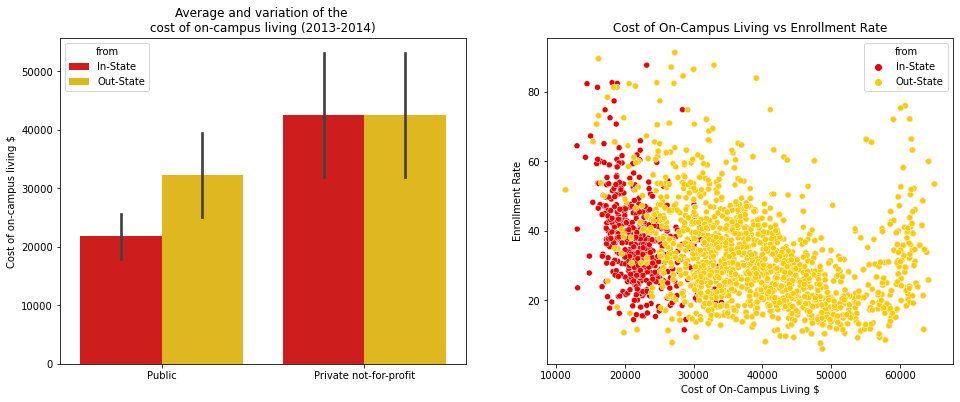

In [301]:
plt.figure(figsize=(16,6))

#with standard deviation
plt.subplot(1,2,1)
sns.barplot(x='control_of_institution',y='price_living',data=in_out_state_df,hue='from',ci="sd",palette='hot');
plt.title('''Average and variation of the 
cost of on-campus living (2013-2014)''')
plt.xlabel('')
plt.ylabel('Cost of on-campus living $')

plt.subplot(1,2,2)
sns.scatterplot(x='price_living',y='enrollment_rate',data=in_out_state_df,hue='from',palette='hot')
plt.title('Cost of On-Campus Living vs Enrollment Rate')
plt.xlabel('Cost of On-Campus Living $')
plt.ylabel('Enrollment Rate');

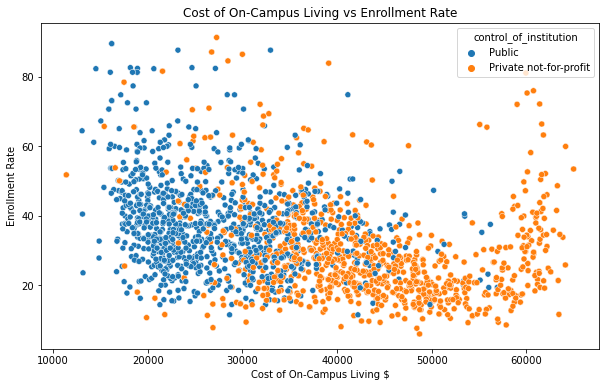

In [302]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price_living',y='enrollment_rate',data=in_out_state_df,hue='control_of_institution')
plt.title('Cost of On-Campus Living vs Enrollment Rate')
plt.xlabel('Cost of On-Campus Living $')
plt.ylabel('Enrollment Rate');

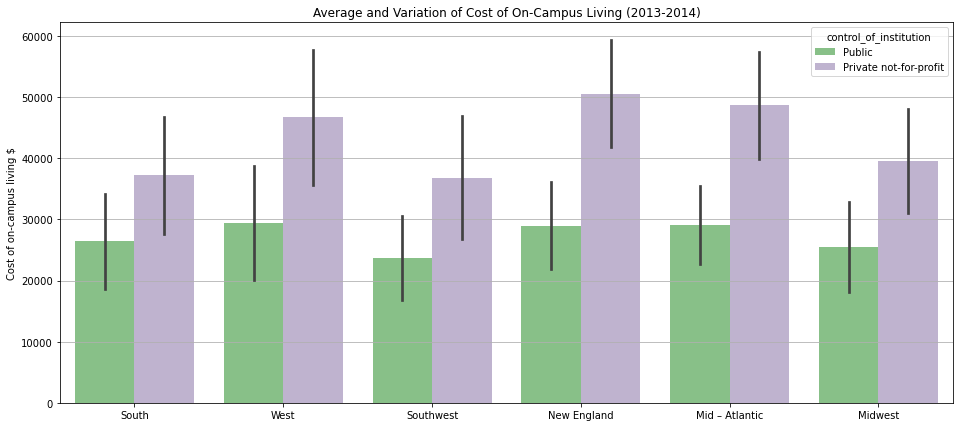

In [303]:
plt.figure(figsize=(16,7))
sns.barplot(x='region',y='price_living',data=in_out_state_df,hue='control_of_institution',ci="sd",palette='Accent');
plt.title('Average and Variation of Cost of On-Campus Living (2013-2014)')
plt.grid(axis='y')
plt.xlabel('')
plt.ylabel('Cost of on-campus living $');

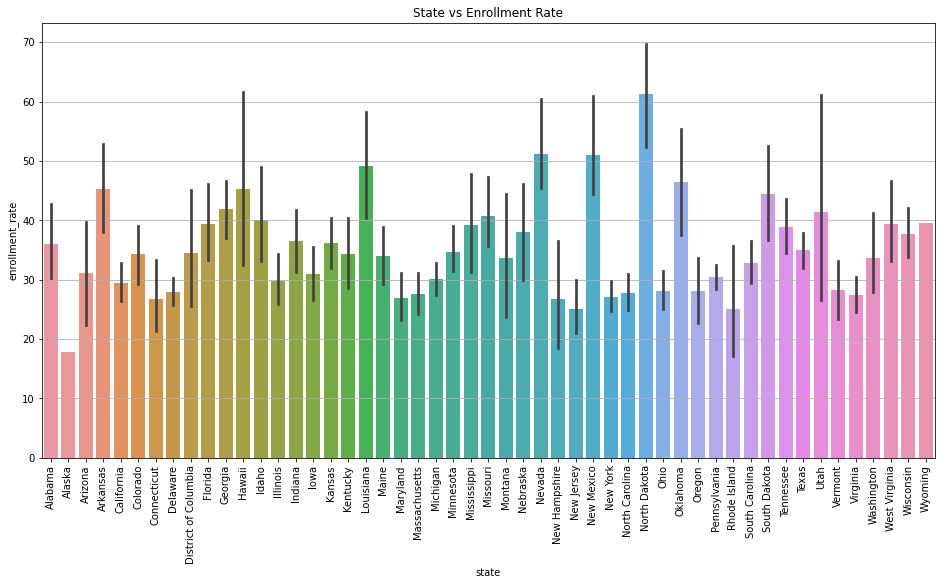

In [307]:
plt.figure(figsize=(16,8))
sns.barplot(x=universitiesnw_df.state,y=universitiesnw_df.enrollment_rate);
plt.title('State vs Enrollment Rate')
plt.grid(axis='y')
plt.xticks(rotation=90);

In [308]:
with open('states_population.csv') as file:
    population_df=pd.read_csv(file)

In [309]:
population_df.head()

,state,population_2013
0,Alabama,4833722
1,Alaska,735132
2,Arizona,6626624
3,Arkansas,2959373
4,California,38332521


In [310]:
universitiesnw_df=universitiesnw_df.merge(population_df,on='state')
universitiesnw_df=universitiesnw_df.rename(columns={'population_2013':'population'})

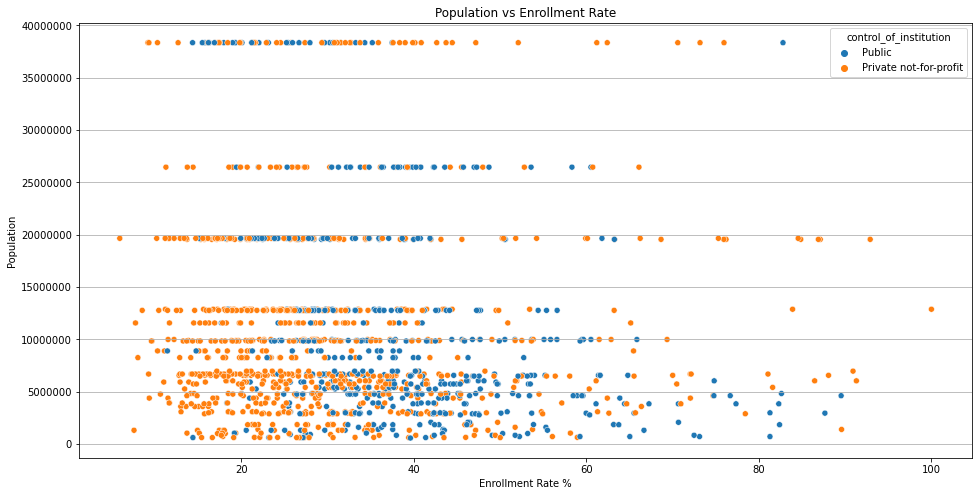

In [311]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(y='population',x='enrollment_rate',data=universitiesnw_df,hue='control_of_institution');
plt.title('Population vs Enrollment Rate')
plt.grid(axis='y')
ax.ticklabel_format(style='plain')
plt.ylabel('Population')
plt.xlabel('Enrollment Rate %');

In [312]:
with open('states_gdp.csv') as file:
    gdp_df=pd.read_csv(file)   #file not given to us so couldnt run rest of the code

FileNotFoundError: [Errno 2] No such file or directory: 'states_gdp.csv'

In [ ]:
gdp_df.head()

In [ ]:
gdp_df.drop(columns=['code'],inplace=True)

In [ ]:
universitiesnw_df=universitiesnw_df.merge(gdp_df,on='state')

In [ ]:
universitiesnw_df[['state','gdp_million','population']].head()

In [ ]:
universitiesnw_df['gdp_capita']=universitiesnw_df.gdp_million/universitiesnw_df.population*1e6

In [313]:
gdp_state_df=universitiesnw_df.groupby('state')[['region','gdp_capita']].mean().sort_values('gdp_capita',ascending=False)

KeyError: "Columns not found: 'gdp_capita'"

In [ ]:
plt.figure(figsize=(16,16))
ax=sns.barplot(x=gdp_state_df.gdp_capita,y=gdp_state_df.index);
ax.set_xlim((0,180000)); plt.title('GDP per Capita of American States'); plt.xlabel('GDP per Capita $');
plt.grid(axis='x',alpha=.1)

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='gdp_capita',y='enrollment_rate',data=universitiesnw_df);
plt.plot([78000,78000], [0, 110], c='magenta',lw=2,marker='*',ls='--') #1w =2-  is the thickness of the center line, then the marker and the dash
plt.title('GDP per Capita vs Enrollment Rate')
plt.grid()
plt.xlabel('GDP per Capita $')
plt.ylabel('Enrollment Rate %');

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='gdp_capita',y='enrollment_rate',data=universitiesnw_df);
plt.axis([30000,80000,0, 101]);
plt.grid();
plt.title('GDP per Capita vs Enrollment Rate')
plt.xlabel('GDP per Capita $')
plt.ylabel('Enrollment Rate %'); sns.despine();

In [318]:
universitiesnw_df

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total,acceptance_rate,enrollment_rate,region,population
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,55.0,51.0,69.0,10.0,23.0,29.0,89.89,20.00,South,4833722
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,61.0,58.0,64.0,29.0,46.0,53.0,86.73,35.93,South,4833722
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,58.0,61.0,55.0,NaN,NaN,67.0,NaN,NaN,South,4833722
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,44.0,44.0,43.0,16.0,37.0,48.0,80.62,39.31,South,4833722
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,61.0,59.0,71.0,9.0,19.0,25.0,51.25,28.17,South,4833722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,University of Wisconsin-Platteville,2013,Master's degree,Yes,Yes,Implied no,Implied no,3399.0,3279.0,1754.0,...,36.0,35.0,46.0,19.0,47.0,54.0,96.47,53.49,Midwest,5742713
1528,University of Wisconsin-River Falls,2013,Master's degree,Yes,Yes,Implied no,Implied no,2602.0,2254.0,1119.0,...,61.0,60.0,69.0,23.0,46.0,51.0,86.63,49.65,Midwest,5742713
1529,University of Wisconsin-Stevens Point,2013,Doctor's degree - professional practice,Yes,Yes,Implied no,Yes,4432.0,3672.0,1637.0,...,53.0,52.0,77.0,22.0,52.0,58.0,82.85,44.58,Midwest,5742713
1530,Ottawa University-Milwaukee,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,75.0,76.0,69.0,NaN,NaN,NaN,NaN,NaN,Midwest,5742713


In [323]:
names=universitiesnw_df.columns[universitiesnw_df.columns.str.startswith('offers')].values
#to selecet ll columns starting with offers from the universitiesnw_df
degree=universitiesnw_df[universitiesnw_df[names]=='Yes'][names].count().sort_values(ascending=False)
#to select all where names variable created above  == yes then count

In [325]:
names

array(['offers_bachelors_degree', 'offers_masters_degree',
       'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice'], dtype=object)

In [324]:
degree

offers_bachelors_degree                        1522
offers_masters_degree                          1249
offers_doctors_degree_research_scholarship      511
offers_doctors_degree_professional_practice     435
dtype: int64

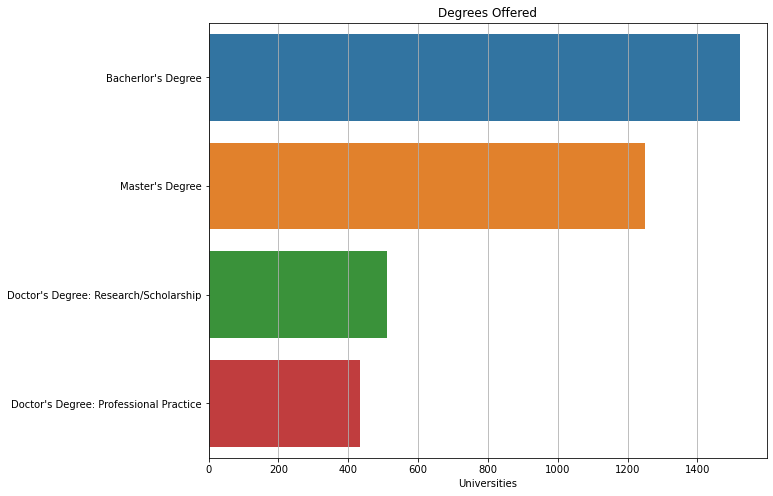

In [327]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=degree,y=degree.index)
ax.set_yticklabels(("Bacherlor's Degree","Master's Degree",
                    "Doctor's Degree: Research/Scholarship",
                    "Doctor's Degree: Professional Practice"));
plt.title('Degrees Offered')
plt.xlabel('Universities')
plt.grid(axis='x');

In [328]:
hg_degree=universitiesnw_df.highest_degree_offered.value_counts()

In [329]:
hg_degree

Master's degree                                                     587
Doctor's degree - research/scholarship and professional practice    311
Bachelor's degree                                                   282
Doctor's degree - research/scholarship                              200
Doctor's degree - professional practice                             124
Doctor's degree - other                                              28
Name: highest_degree_offered, dtype: int64

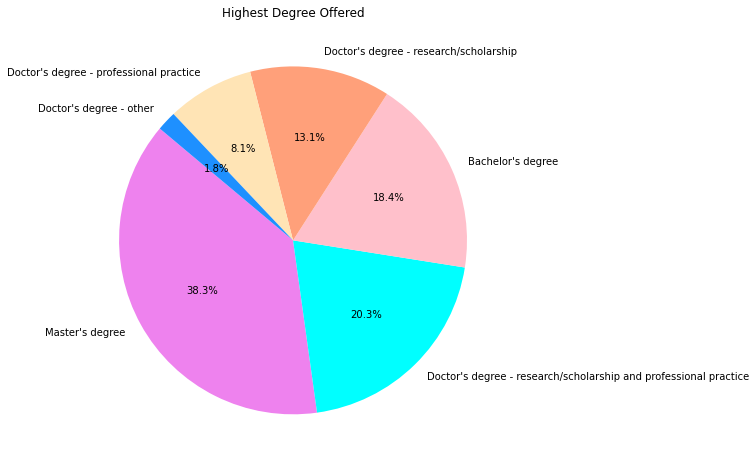

In [331]:
plt.figure(figsize=(16,8))
plt.pie(hg_degree,labels=hg_degree.index,
       autopct='%.1f%%',startangle=140,colors = ['violet','aqua','pink','lightsalmon','moccasin','dodgerblue'])
plt.title('Highest Degree Offered');  #autopct means to show d % figs in the pie chart

C:\Users\Eugochi\AppData\Local\Temp\ipykernel_12784\3329293575.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(('''Doctor's Degree:


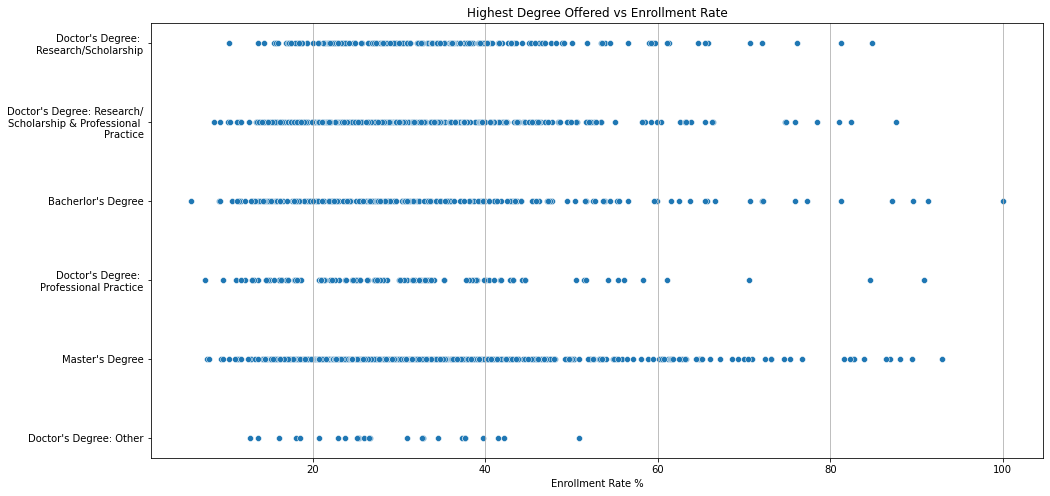

In [335]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(y='highest_degree_offered',x='enrollment_rate',data=universitiesnw_df);
plt.title('Highest Degree Offered vs Enrollment Rate')
plt.ylabel('')
plt.xlabel('Enrollment Rate %')
plt.grid(axis='x')
ax.set_yticklabels(('''Doctor's Degree: 
Research/Scholarship''',
                    '''Doctor's Degree: Research/
Scholarship & Professional 
Practice''',
                    "Bacherlor's Degree",
                    '''Doctor's Degree: 
Professional Practice''',
                    "Master's Degree",
                    "Doctor's Degree: Other"));

In [ ]:
#ASSIGNMENT

#Make at least three more analysis and inferences from the dataset given. You can take inspration from the below future works, but feel free to come up with your own inferences and analysis.

#Make sure to submit to me personally to check for you.